In [75]:
import pandas as pd
import numpy as np

#  Import  Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#  Import Stats Libraries
from scipy import stats



## **Intro to Stats** 
### **Chapter III.More Distributions and the Central Limit Theorem**

### **GUÍA MAESTRA DE PRÁCTICA: CAPÍTULO 3 - DISTRIBUCIONES DE PROBABILIDAD Y EL TEOREMA DEL LÍMITE CENTRAL**

### 🧠 **Introducción: De los Datos a la Inferencia**

Hemos aprendido a describir datos. Ahora, aprenderemos a entender la **incertidumbre** y a hacer **inferencias** sobre el mundo. Las distribuciones de probabilidad son el lenguaje que usamos para describir procesos aleatorios, desde las ventas diarias hasta el tiempo entre visitas a una web. El Teorema del Límite Central (TLC) es la piedra angular que nos permite usar muestras para hacer afirmaciones sorprendentemente precisas sobre poblaciones enteras.

En este capítulo, no solo aprenderás las fórmulas; **desarrollarás una intuición** sobre qué distribución usar para cada problema y cómo emplear el TLC para tomar decisiones de negocio basadas en datos.

### **Sección 1: La Distribución Normal (La Campana de Gauss)**

Es la distribución más importante en estadística. Modela una vasta cantidad de fenómenos del mundo real donde los valores tienden a agruparse alrededor de un promedio central.

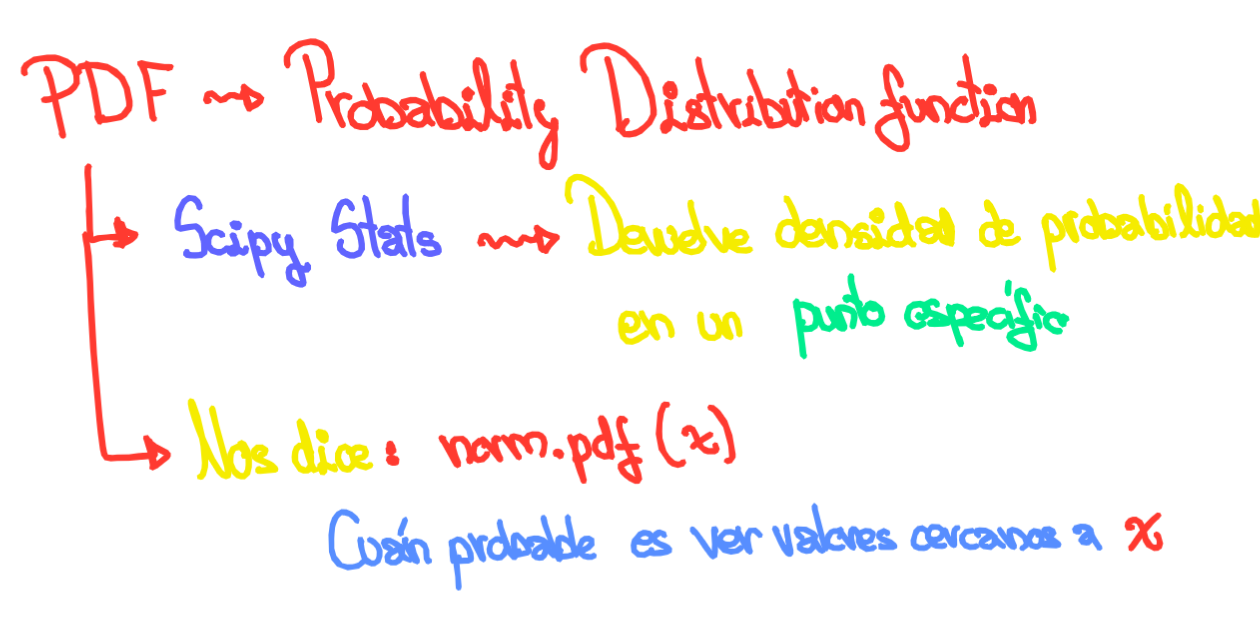
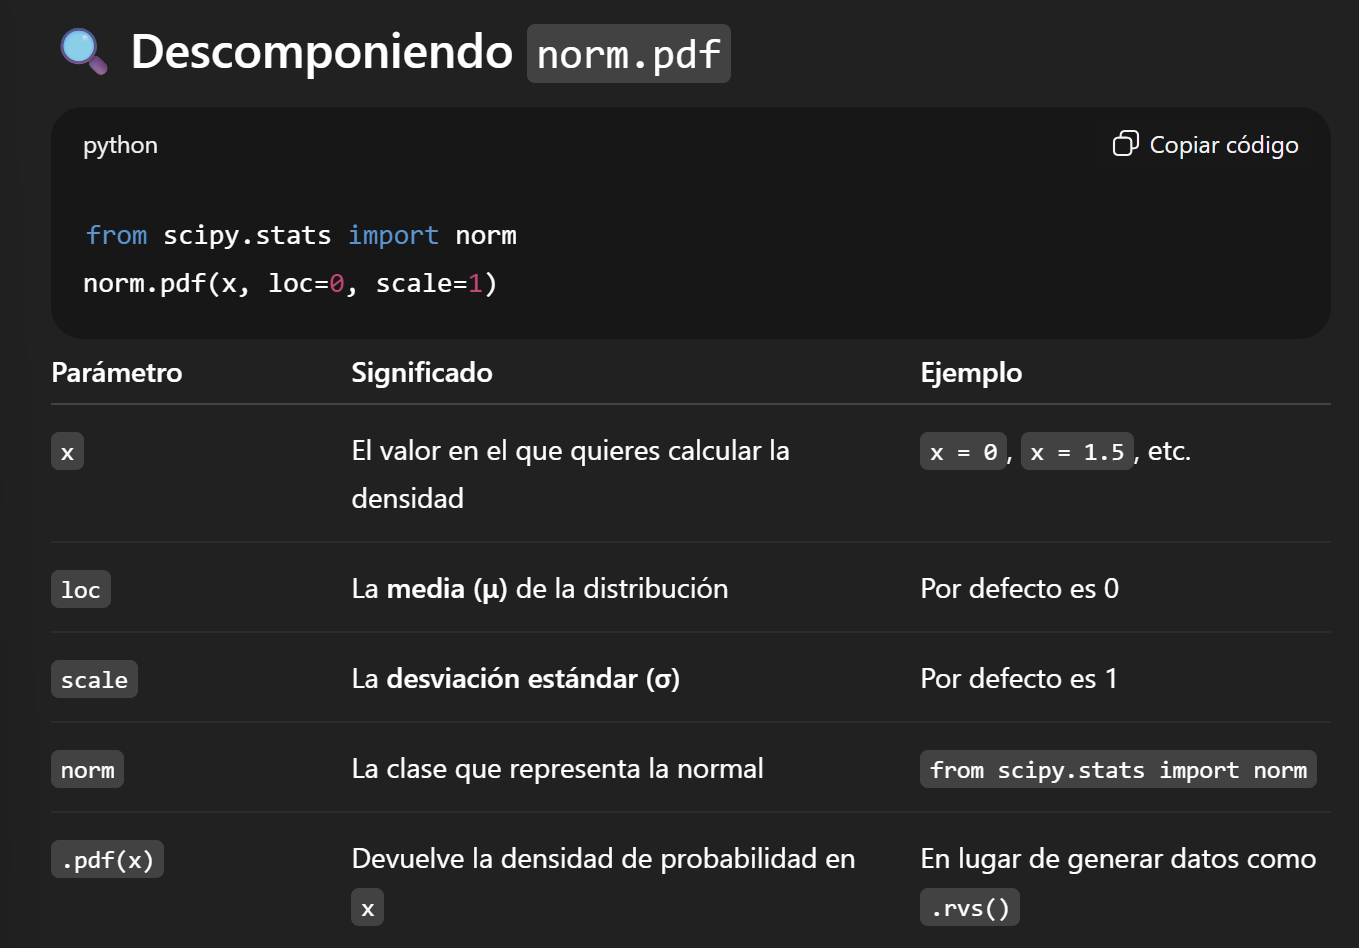

Para un punto x = `2` la densidad es la siguiente: 0.05399096651318806
Para un punto x = `0` la densidad es la siguiente: 0.3989422804014327


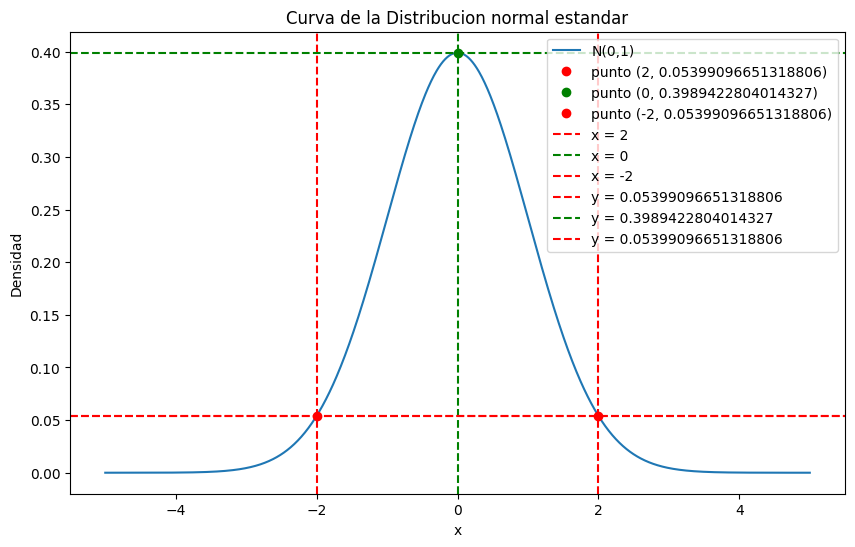

In [76]:
#Importar Librerias

from scipy.stats import norm

x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, loc=0, scale =1)

y_1 = norm.pdf(2,loc = 0, scale = 1) 
print(f"Para un punto x = `2` la densidad es la siguiente: {y_1}")

y_2 = norm.pdf(0, loc=0, scale=1)
print(f"Para un punto x = `0` la densidad es la siguiente: {y_2}")

y_3 = norm.pdf(-2, loc = 0, scale = 1)

# Grafica la curva de la distribucion normal estandar
# Grafica el Punto `y_1` en la curva de la distribucion normal estandar

# Definir el Tamaño de la Figura
plt.figure(figsize=(10, 6))

# Graficar la curva de la distribucion normal estandar
plt.plot(x, y, label = "N(0,1)")

# Graficar X = 2
plt.plot(2, y_1, 'ro', label=f"punto (2, {y_1})")

#Graficar X =0 
plt.plot(0, y_2, 'go', label=f"punto (0, {y_2})")

#Graficar X = -2
plt.plot(-2, y_3,'ro', label=f"punto (-2, {y_3})")

# Linea Vertical 
plt.axvline(x=2, color='red', linestyle='--', label='x = 2')
plt.axvline(x=0, color='green', linestyle='--', label='x = 0')
plt.axvline(x=-2, color='red', linestyle='--', label='x = -2')    

#Linea Horizontal
plt.axhline(y=y_1, color='red', linestyle='--', label=f'y = {y_1}')
plt.axhline(y=y_2, color='green', linestyle='--', label=f'y = {y_2}')
plt.axhline(y=y_3, color='red', linestyle='--', label=f'y = {y_3}') 

#Colocar los Titulos 
plt.title("Curva de la Distribucion normal estandar")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.show()




#### **1.1 Ejercicio Focalizado: Comprendiendo las Ventas de un E-commerce**
*   **🎯 Objetivo:** Utilizar la distribución normal para modelar las ventas diarias de un producto y calcular la probabilidad de alcanzar ciertos objetivos.
*   **💡 Concepto Clave a Recordar:** La distribución normal se define por dos parámetros: la **media (μ)**, que es el centro de la campana, y la **desviación estándar (σ)**, que mide la dispersión o ancho de la campana. En Python, la librería `scipy.stats` es nuestra herramienta principal, específicamente el módulo `norm`.
    *   `norm.cdf(x, loc=μ, scale=σ)`: **Función de Distribución Acumulada (CDF)**. Devuelve la probabilidad de que un valor sea **menor o igual** a `x`. Es el área bajo la curva a la izquierda de `x`.
    *   `norm.ppf(p, loc=μ, scale=σ)`: **Función de Punto Percentil (PPF)** o Inversa de la CDF. Devuelve el valor `x` por debajo del cual se encuentra una probabilidad `p`.
*   **📝 Ejercicio:** Amir es un vendedor en un e-commerce. Sus ventas diarias de un producto popular siguen una distribución normal con una **media (μ) de $1,200** y una **desviación estándar (σ) de $300**.
    1.  ¿Cuál es la probabilidad de que Amir venda **menos de $1,000** en un día?
    2.  ¿Cuál es la probabilidad de que venda **más de $1,800** en un día?
    3.  ¿Cuál es la probabilidad de que venda **entre $1,100 y $1,400**?
    4.  Para recibir un bono, Amir necesita estar en el 10% de los mejores días de ventas. ¿Cuánto necesita vender como mínimo para obtener el bono?

In [77]:
#Paso 1: Importar Librerias 

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

mean = 1200
std = 300

# 1. Probabilidad de Vender Al menos $1000 en un dia
prob_menos_1000 = norm.cdf(1000, loc=mean , scale = std)
print(f"1. Probabilidad de Ventas < $1,000: {prob_menos_1000}")

# 2. Probabilidad de Vender Mas de $1800 en un dia
prob_mas_1800 = 1-  norm.cdf(1800, loc = mean,scale = std) 
print(f"2. Probablidad de Ventas > $1,800: {prob_mas_1800} ")

# 3. $1100 < Probabilidad de Ventas < $1400 en un dia
prob_entre = norm.cdf(1400, loc = mean, scale = std) - norm.cdf(1100, loc = mean, scale = std) 
print(f"3. $1,100 < Probabilidad de Ventas < $1,400 es de: {prob_entre}")

# 4. Umbral para el 10% superior (bono)
#----Buscamos el Valor que dea el 90% del area a la izquierda (1 - 0,10)
umbral_bono = norm.ppf(0.90, loc = mean, scale = std)
print(f"4. Para Obtener el bono, Amir debe vebder almenos: ${umbral_bono:.2f}")


1. Probabilidad de Ventas < $1,000: 0.2524925375469229
2. Probablidad de Ventas > $1,800: 0.02275013194817921 
3. $1,100 < Probabilidad de Ventas < $1,400 es de: 0.3780661222713134
4. Para Obtener el bono, Amir debe vebder almenos: $1584.47


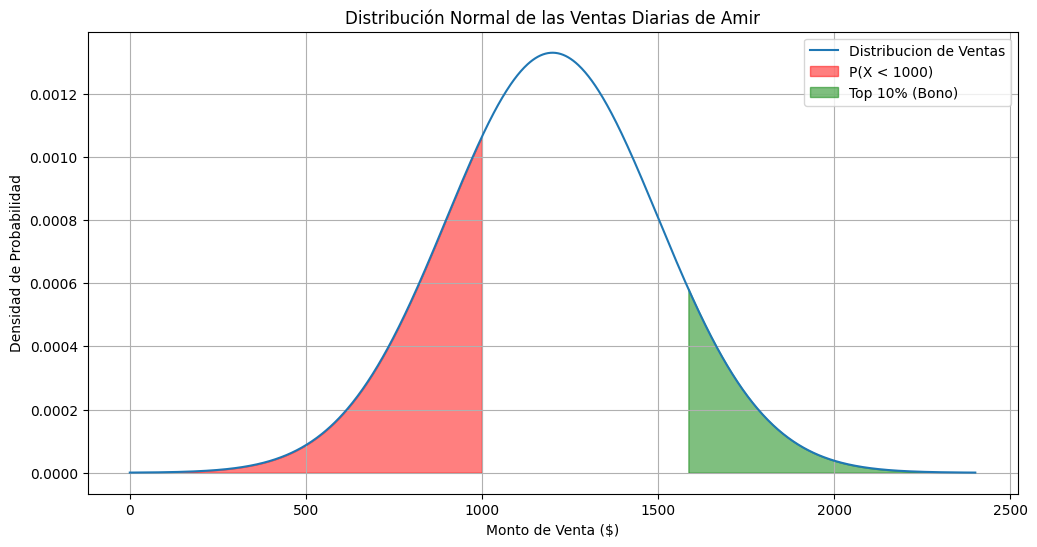

In [78]:
# Visualizacion 

x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
y = norm.pdf(x,loc = mean, scale = std)
plt.figure(figsize=(12,6))
plt.plot(x, y, label = "Distribucion de Ventas")
plt.fill_between(x, y, where=( x <= 1000), color = 'red', alpha = 0.5, label = 'P(X < 1000)')
plt.fill_between(x, y, where=(x >= umbral_bono), color='green', alpha=0.5, label='Top 10% (Bono)')
plt.title("Distribución Normal de las Ventas Diarias de Amir")
plt.xlabel("Monto de Venta ($)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True)
plt.show()


### **Sección 2: El Teorema del Límite Central (La Magia de las Muestras)**

Este es quizás el teorema más poderoso de la estadística. Nos dice algo increíble: no importa la forma de la distribución original de una población, la **distribución de las medias de sus muestras** se aproximará a una distribución normal a medida que el tamaño de la muestra aumenta.

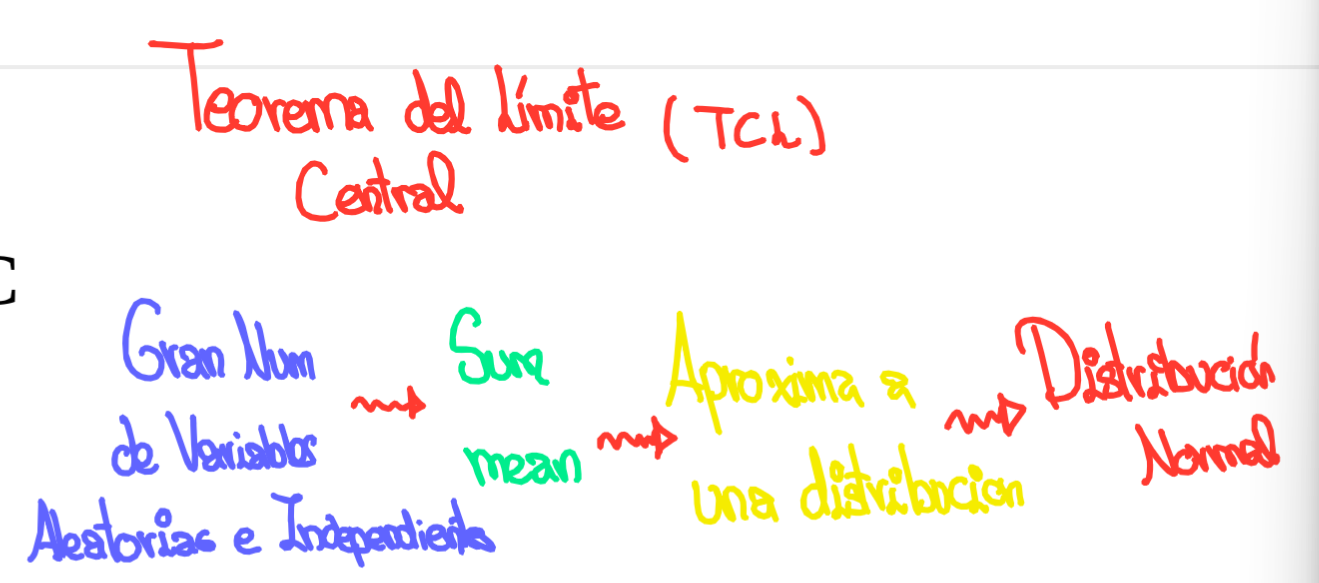

#### **2.1 Ejercicio de Integración: Estimando la Satisfacción del Cliente**
*   **🎯 Objetivo:** Entender y aplicar el TLC para estimar un parámetro poblacional (la media) a partir de múltiples muestras.
*   **💡 Concepto Clave a Recordar:**
    *   **Población:** El conjunto completo de datos (ej. las calificaciones de *todos* tus clientes).
    *   **Muestra:** Un subconjunto de la población (ej. las calificaciones de 50 clientes que encuestaste hoy).
    *   **Distribución Muestral de la Media:** La distribución de probabilidad de las medias calculadas a partir de un gran número de muestras del mismo tamaño.
    *   **El TLC establece que:** La media de la distribución muestral será igual a la media de la población (`μ`). La desviación estándar de la distribución muestral, llamada **Error Estándar (SE)**, será `σ / sqrt(n)`, donde `σ` es la desviación estándar de la población y `n` es el tamaño de la muestra.
*   **📝 Ejercicio:** Administras una plataforma de cursos online. La calificación de satisfacción de los cursos (de 1 a 10) es muy variable y **no sigue una distribución normal** (muchos le dan 10, algunos le dan 1, pocos en el medio). La media de satisfacción de la población es `μ = 8.5` con una desviación estándar `σ = 2.0`.
    Tu misión es **demostrar el TLC en acción**:
    1.  Toma 500 muestras, cada una de 30 calificaciones (`n=30`).
    2.  Calcula la media de cada una de estas 500 muestras.
    3.  Crea un histograma de estas 500 medias muestrales. ¿A qué se parece?
    4.  Calcula la media y la desviación estándar de tus 500 medias muestrales. Compáralas con lo que predice el TLC.

 La Media de la Poblacion Real (No Normal): 7.15
La Desviacion Esrandar de la poblacion Real: 3.24



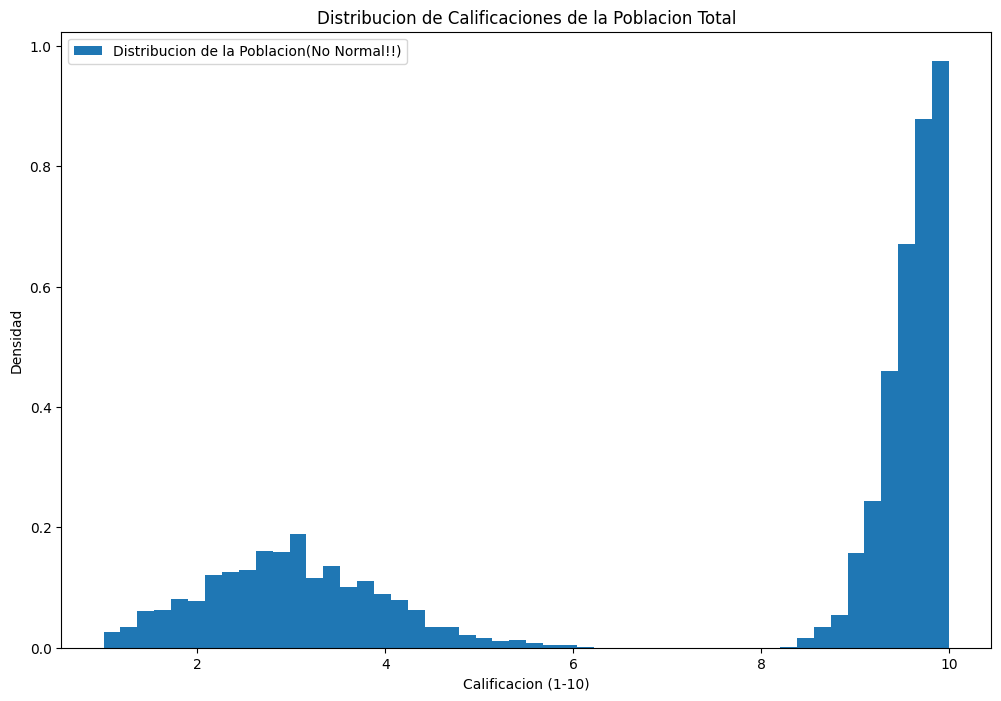

In [79]:
# Importar Librerias

import numpy as np
import matplotlib.pyplot as plt

# Establecer la Semilla de Reproducibilidad
np.random.seed(42)

pop_part1 = np.random.normal(10, 0.5, 5000)
pop_part2 = np.random.normal(3,1,1500)


# Juntar 
population = np.concatenate([pop_part1, pop_part2])

# Filtrar los Valores que estan fuera del Rango de Calificacion 
population = population[(population >= 1) & (population <= 10)]

pop_mean = population.mean()
pop_std = population.std()

print(f" La Media de la Poblacion Real (No Normal): {pop_mean:.2f}")
print(f"La Desviacion Esrandar de la poblacion Real: {pop_std:.2f}\n")

# Vizualizacion  para confirmar que no es Normal
plt.figure(figsize=(12,8))
plt.hist(population, bins = 50, density = True, label = 'Distribucion de la Poblacion(No Normal!!)')
plt.title('Distribucion de Calificaciones de la Poblacion Total')
plt.xlabel('Calificacion (1-10)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [80]:
# --- DEMOSTRACION DEL TLC ---
sample_size = 30
num_samples = 500
sample_means = []

# 1. Tomar 500 muestras t 2. Calcular las Muestras
for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace = True)
    sample_means.append(sample.mean())
    
print(np.mean(sample_means))
print(len(sample_means))   


7.1682343602540985
500


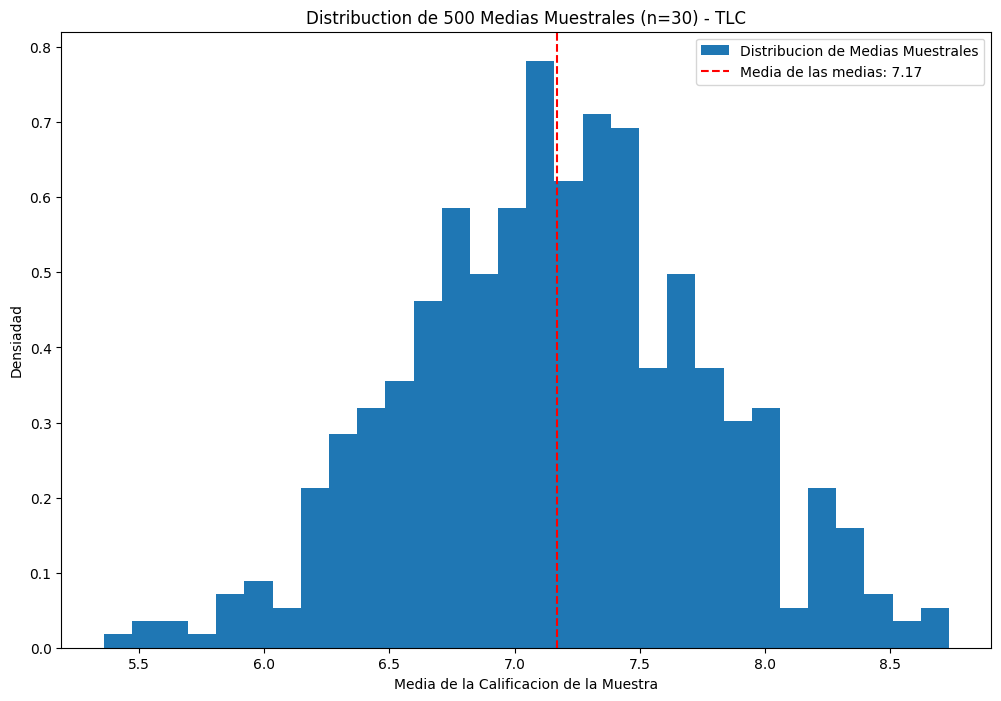

In [81]:
# Visualizar el Histograma de las Medias Muestrales
plt.figure(figsize=(12,8))
plt.hist(sample_means, bins=30, density=True, label = 'Distribucion de Medias Muestrales')
plt.title(f'Distribuction de {num_samples} Medias Muestrales (n={sample_size}) - TLC')
plt.xlabel('Media de la Calificacion de la Muestra')
plt.ylabel('Densiadad')
plt.axvline(np.mean(sample_means), color='red', linestyle='--', label=f'Media de las medias: {np.mean(sample_means):.2f}')
plt.legend()
plt.show()



In [82]:
# 4. Comparar con las predicciones del TLC

mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means)

# Predicciones del TLC
tlc_predicted_mean = pop_mean
tlc_predicted_se = pop_std / np.sqrt(sample_size)

print("--- Resultados del TLC ---")
print(f"Media de las medias muestrales (Observada): {mean_of_sample_means:.2f}")
print(f"Media predicha por el TLC: {tlc_predicted_mean:.2f}\n")

print(f"Desv. Est. de las medias muestrales (Error Estándar Observado): {std_of_sample_means:.2f}")
print(f"Error Estándar predicho por el TLC (σ/sqrt(n)): {tlc_predicted_se:.2f}")

--- Resultados del TLC ---
Media de las medias muestrales (Observada): 7.17
Media predicha por el TLC: 7.15

Desv. Est. de las medias muestrales (Error Estándar Observado): 0.59
Error Estándar predicho por el TLC (σ/sqrt(n)): 0.59


### **Sección 3: La Distribución de Poisson (Contando Eventos en el Tiempo o Espacio)**

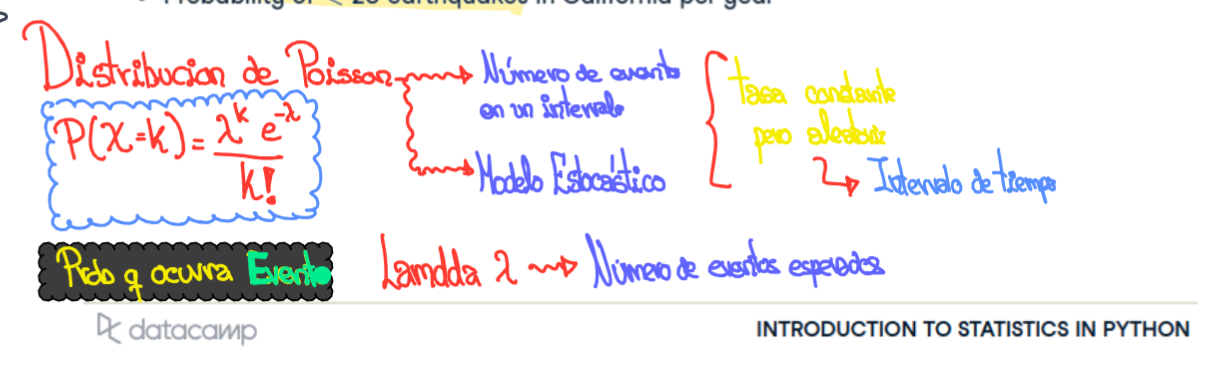

Esta distribución es perfecta para modelar el **número de veces que ocurre un evento** en un intervalo fijo de tiempo o espacio, cuando los eventos son independientes y ocurren a una tasa promedio constante.

#### **3.1 Ejercicio Focalizado: Gestión de un Centro de Llamadas**
*   **🎯 Objetivo:** Usar la distribución de Poisson para predecir el número de llamadas y gestionar adecuadamente al personal.
*   **💡 Concepto Clave a Recordar:** La distribución de Poisson se define por un solo parámetro: **lambda (λ)**, que es la **tasa promedio** de eventos en el intervalo. Es una distribución **discreta** (solo puede tomar valores enteros: 0, 1, 2, ... llamadas, no 1.5 llamadas).
    *   `poisson.pmf(k, mu=λ)`: **Función de Masa de Probabilidad (PMF)**. Devuelve la probabilidad de observar **exactamente** `k` eventos.
    *   `poisson.cdf(k, mu=λ)`: **Función de Distribución Acumulada (CDF)**. Devuelve la probabilidad de observar **k o menos** eventos.
*   **📝 Ejercicio:** Un centro de soporte técnico recibe, en promedio, **5 llamadas por hora (λ=5)**.
    1.  ¿Cuál es la probabilidad de recibir **exactamente 3** llamadas en la próxima hora?
    2.  ¿Cuál es la probabilidad de recibir **5 o menos** llamadas en la próxima hora?
    3.  ¿Cuál es la probabilidad de recibir **más de 7** llamadas? (Esto podría sobrecargar al agente de turno).
*   **💻 Solución en Código:**

In [83]:
# Importar Libreria 
from scipy.stats import poisson

# Establecer Lambda
## ----- Paraetro de Distribucion : Tasa Promedio
labd = 5

# 1. Probabilidad de Recibir Exactamente 3 llamdas en la Proxima Hora
three_calls = poisson.pmf(3, mu = labd)
print(f"1. Probablidad de Recibir 3 llamadas es de {three_calls:.2f}")

# 2. Probabilidad de Recibir a 4 llamdas o menos 
at_least_4_calls = poisson.cdf(4, labd)
at_least_4_calls = at_least_4_calls * 100
print(f"2. La probablidad de recibir 4 llamdas o menos es de {at_least_4_calls:.2f}%")

# 3. Probabilidad de Recibir mas de 7 llamadas?
more_than_seven = (1 - poisson.cdf(7, labd)) * 100
print(f"3. Probabilidad de Recibir mas de 7 llamas es de: {more_than_seven:.2f}%")



1. Probablidad de Recibir 3 llamadas es de 0.14
2. La probablidad de recibir 4 llamdas o menos es de 44.05%
3. Probabilidad de Recibir mas de 7 llamas es de: 13.34%



*   **💻 Solución en Código:**
    ```python
    import numpy as np
    from scipy.stats import t, norm

    # Datos de la muestra
    uplifts = np.array([1.5, 2.8, 0.9, 3.5, 2.1, 4.2, 1.8, 2.5, 2.9, 3.1, 0.5, 3.8])

    # 1. Calcular los estadísticos de la MUESTRA
    n = len(uplifts)
    media_muestral = np.mean(uplifts)
    s = np.std(uplifts, ddof=1) # ¡Importante! Usar ddof=1 para la desv. est. muestral
    print(f"Tamaño de la muestra (n): {n}")
    print(f"Media muestral: {media_muestral:.2f}%")
    print(f"Desviación estándar muestral (s): {s:.2f}%\n")

    # 2. Calcular el Error Estándar (SE)
    error_estandar = s / np.sqrt(n)
    print(f"Error Estándar (SE): {error_estandar:.2f}%\n")

    # 3. Encontrar el valor t-crítico para un 95% de confianza
    grados_libertad = n - 1
    confianza = 0.95
    alfa = 1 - confianza # Nivel de significancia
    # Buscamos el punto que deja (1 - alfa/2) del área a la izquierda
    valor_t_critico = t.ppf(1 - alfa/2, df=grados_libertad)
    print(f"--- Cálculo del Intervalo de Confianza ---")
    print(f"Grados de libertad (df): {grados_libertad}")
    print(f"Valor t-crítico para 95% de confianza: {valor_t_critico:.3f}")

    # (Para comparación, el valor z de la normal sería)
    valor_z_critico = norm.ppf(1 - alfa/2)
    print(f"Valor z-crítico equivalente (Normal): {valor_z_critico:.3f} (¡Observa que es menor!)\n")

    # 4. Calcular el Margen de Error y el Intervalo de Confianza
    margen_de_error = valor_t_critico * error_estandar
    ic_inferior = media_muestral - margen_de_error
    ic_superior = media_muestral + margen_de_error
    print(f"Margen de Error: {margen_de_error:.2f}%")
    print(f"Intervalo de Confianza del 95%: ({ic_inferior:.2f}%, {ic_superior:.2f}%)")
    ```



.


## **MORE PROBABILITY DISTRIBUTIONS**
---

### **Sección 4: La Distribución Exponencial (El Tiempo Entre Eventos)**

Esta distribución es la compañera inseparable de la distribución de Poisson. Si Poisson cuenta *cuántos eventos* ocurren en un intervalo, la distribución Exponencial modela el **tiempo que transcurre entre la ocurrencia de esos eventos**.

#### **4.1 Ejercicio Integrador: Optimizando la Experiencia de Usuario en una Web**
*   **🎯 Objetivo:** Usar la distribución exponencial para entender y predecir el tiempo entre la llegada de nuevos usuarios a un sitio web, lo que permite tomar decisiones sobre la asignación de recursos del servidor.
*   **💡 Concepto Clave a Recordar:**
    *   **Relación con Poisson:** Si los eventos (llegadas de usuarios) siguen una distribución de Poisson con una tasa promedio **λ** (ej. 5 usuarios por minuto), entonces el tiempo entre cada llegada sigue una distribución exponencial.
    *   **Parámetro `scale` en `scipy`:** `scipy.stats.expon` está estandarizada. Su parámetro clave es `scale`, que es el inverso de la tasa lambda: `scale = 1/λ`. Si la tasa `λ` es de 5 usuarios/minuto, `scale` es `1/5 = 0.2` minutos/usuario. `scale` representa el **tiempo promedio entre eventos**.
    *   **Función Clave:** `expon.cdf(x, scale=1/λ)` nos da la probabilidad de que el tiempo hasta el próximo evento sea **menor o igual a `x`**.
*   **📝 Ejercicio:** Un sitio web de noticias popular recibe, en promedio, **10 nuevos visitantes por minuto (λ=10)** durante las horas pico.
    1.  ¿Cuál es el tiempo promedio entre la llegada de un visitante y el siguiente?
    2.  ¿Cuál es la probabilidad de que el próximo visitante llegue en **menos de 5 segundos**?
    3.  El sistema necesita al menos 30 segundos para realizar una tarea de mantenimiento en segundo plano entre sesiones. ¿Cuál es la probabilidad de que el sistema **no sea interrumpido** (es decir, que el próximo visitante tarde más de 30 segundos en llegar)?

* **💻 Solución en Código:**

In [84]:
# Importar Librarias 
from scipy.stats import expon
import numpy as np 
import matplotlib as plt

# Parametro de la distribucion: Tasa promedio (Eventos por Minuto)
lambda_visitantes = 10

#Paso 1. Calcular `scale` el tiempo promedio entre Llegadas
tiempo_promedio = 1/lambda_visitantes

print(f'1. El tiempo promedio entre visitantes es de {tiempo_promedio} minutos, o {tiempo_promedio*60:.0f} segundos. \n')

# Ser Consciente de Las Unidades a Emplear 
# Hay que ser conscientes con las Unidades. Usemos MINUTOS
# 5 segundos = 5/60 minutos
# 30 segundos = 30/60 = 0.5 minutos

# 2. Probabildad de que el Proximo Visitante llegue en Menos De 5 segundos 
## 2.1. Conversion a la Unidades Correctas
tiempo_limite_seg = 5
timempo_limite_min = tiempo_limite_seg / 60

## 2.2.  Scipy - expon
prob_menos_5_seg = expon.cdf(timempo_limite_min, scale = tiempo_promedio)
print(f"2. La probabilidad de que llegue un cliente en menos de 5 segundos es {prob_menos_5_seg*100:.2f}%")

# 3. Probabilidad que el Siguiente usuario demora mas de 3o segundos

tiempo_lim_30 = 30/60
prob_mas_30_s = 1 - expon.cdf(tiempo_lim_30, tiempo_promedio) 
print(f'La probabilidad que el CLiente Demore 30 segundo o mas es de {prob_mas_30_s*100:.2f}%')

1. El tiempo promedio entre visitantes es de 0.1 minutos, o 6 segundos. 

2. La probabilidad de que llegue un cliente en menos de 5 segundos es 56.54%
La probabilidad que el CLiente Demore 30 segundo o mas es de 67.03%


🧠 **Analisis:**
- **Paso Crucial de Unidades:** El error más común es mezclar unidades. La tasa `λ` está en "eventos por minuto", por lo que el `scale` y la variable `x` deben estar en "minutos por evento". Convertimos los segundos a minutos para todos los cálculos.
    *   **Pregunta 1:** La intuición es clave. Si llegan 10 por minuto, es lógico que el tiempo entre ellos sea 1/10 de minuto. El parámetro `scale` de la distribución exponencial *es* el tiempo promedio entre eventos.
    *   **Pregunta 2:** Un cálculo directo de la CDF. `expon.cdf` nos da la probabilidad de que el evento ocurra *dentro* de un marco de tiempo `x`.
    *   **Pregunta 3:** Para "más de" un tiempo `x`, volvemos a usar la regla del complemento: `1 - P(evento ocurra antes de x)`. En este caso, la probabilidad de que el sistema tenga su ventana de 30 segundos es muy baja (solo ~0.67%), lo que indica a los ingenieros que necesitan una estrategia de mantenimiento diferente. La visualización lo hace muy claro: la mayor parte del área bajo la curva está a la izquierda de los 30 segundos.

---


### **Sección 5: La Distribución t de Student (Estadística para el Mundo Real)**

Esta es la distribución del científico de datos pragmático. Se parece a la distribución normal, pero con "colas más gordas". La usamos cuando tenemos que estimar la media de una población con una **muestra pequeña (típicamente n < 30)** y, crucialmente, **no conocemos la desviación estándar de la población (σ)**, que es casi siempre el caso en la vida real.

#### **5.1 Ejercicio de Integración: Evaluando el Impacto de una Campaña de Marketing**
*   **🎯 Objetivo:** Utilizar la distribución t para construir un intervalo de confianza para la media de una población, basándose en una muestra pequeña. Esto permite cuantificar la incertidumbre de nuestros resultados.
*   **💡 Concepto Clave a Recordar:**
    *   **Incertidumbre Adicional:** Como no conocemos `σ` y la estimamos con la desviación estándar de la muestra (`s`), introducimos más incertidumbre. Las "colas gordas" de la distribución t reflejan esta incertidumbre, resultando en intervalos de confianza más amplios y prudentes.
    *   **Grados de Libertad (df):** Es el único parámetro de la distribución t, y se calcula como `df = n - 1`, donde `n` es el tamaño de la muestra.
    *   **Intervalo de Confianza:** La fórmula es `media_muestral ± margen_de_error`. El margen de error se calcula como `valor_t_crítico * error_estándar`.
        *   **Error Estándar (SE):** `s / sqrt(n)`
        *   **Valor t-crítico:** Se obtiene con `t.ppf(probabilidad, df)`. Para un intervalo de confianza del 95%, buscamos el valor que deja el 97.5% del área a la izquierda (porque el 5% de incertidumbre se divide en 2.5% en cada cola).
*   **📝 Ejercicio:** Un equipo de marketing prueba un nuevo diseño de anuncio en **12 ciudades (`n=12`)**. Miden el "uplift" (aumento porcentual en clics) en comparación con el anuncio antiguo. Los resultados son:
    `uplifts = [1.5, 2.8, 0.9, 3.5, 2.1, 4.2, 1.8, 2.5, 2.9, 3.1, 0.5, 3.8]`
    La dirección quiere saber: "Con un 95% de confianza, ¿cuál es el rango del verdadero uplift promedio si lanzamos esta campaña en todo el país?"

*   **🧠 Desglose de la Solución:**
    *   **`ddof=1`:** Este es un detalle técnico **CRUCIAL**. Al calcular la desviación estándar de una *muestra* para estimar la de la población, debemos dividir por `n-1` en lugar de `n`. `np.std` por defecto divide por `n`. Establecer `ddof=1` (Delta Degrees of Freedom) corrige esto. Pandas lo hace por defecto, pero con NumPy hay que especificarlo.
    *   **La Comparación t vs. z:** Observa que `valor_t_critico` (2.201) es mayor que `valor_z_critico` (1.960). Esto es el castigo por tener una muestra pequeña. La distribución t nos obliga a usar un multiplicador más grande, lo que resulta en un `margen_de_error` más amplio. Esto es ser honesto sobre nuestra incertidumbre.
    *   **La Interpretación Final:** La conclusión para la dirección no es "el uplift promedio es 2.63%". La conclusión correcta y profesional es: "Basado en nuestra prueba piloto, tenemos un 95% de confianza en que el verdadero uplift promedio, si se lanza a nivel nacional, se encontrará **entre 1.88% y 3.39%**". Este rango cuantifica el riesgo y permite una mejor toma de decisiones.

---

In [86]:
# Importar Librerias

import numpy as np
from scipy.stats import t, norm

# Datos de la muestra
uplifts = np.array([1.5, 2.8, 0.9, 3.5, 2.1, 4.2, 1.8, 2.5, 2.9, 3.1, 0.5, 3.8])

# Paso 1. Encontrar los Estadisticos de la Muestra
n = len(uplifts)
media_muestra = np.mean(uplifts)
std_muestra = np.std(uplifts, ddof=1)  # Usar ddof=1 para la desviación estándar muestral
print(f"Tamaño de la muestra (n): {n}")
print(f"Media de la muestra: {media_muestra:.2f}")
print(f"Desviación estándar de la muestra: {std_muestra:.2f}\n")

# Paso 2. Calcular el Erro Standar (SE)
se = std_muestra / np.sqrt(n)
print(f"Error estándar (SE): {se:.2f}\n")

# Paso 3. Encontrar el Valor Critico para un 95% de Confianza
grados_libertad = n - 1
confianza = 0.95
alfa = 1 - confianza
t_critico = t.ppf(1 - alfa/2, df=grados_libertad)
print(f"Valor crítico t para un nivel de confianza del {confianza* 100:.0f}%: {t_critico:.2f}\n")
# Paso 4. Calcular el Intervalo de Confianza
margen_error = t_critico * se
ic_inf = media_muestra - margen_error
ic_sup = media_muestra + margen_error
print(f"Intervalo de confianza del {confianza*100:.0f}%: ({ic_inf:.2f}, {ic_sup:.2f})\n")
# Paso 5. Interpretar el Resultado
print(f"Interpretación: Estamos {confianza*100:.0f}% seguros de que el verdadero uplift promedio de la campaña está entre {ic_inf:.2f} y {ic_sup:.2f}.\n")
# Paso 6. Visualizar el Intervalo de Confianza



Tamaño de la muestra (n): 12
Media de la muestra: 2.47
Desviación estándar de la muestra: 1.14

Error estándar (SE): 0.33

Valor crítico t para un nivel de confianza del 95%: 2.20

Intervalo de confianza del 95%: (1.74, 3.19)

Interpretación: Estamos 95% seguros de que el verdadero uplift promedio de la campaña está entre 1.74 y 3.19.



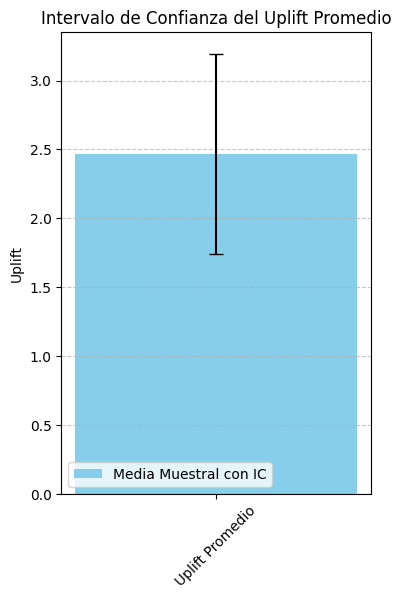

In [88]:
import matplotlib.pyplot as plt
# Crear un gráfico de barras para la media muestral
plt.figure(figsize=(4, 6))
plt.bar(['Uplift Promedio'], [media_muestra], yerr=margen_error, capsize=5, color='skyblue', label='Media Muestral con IC')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Intervalo de Confianza del Uplift Promedio')
plt.ylabel('Uplift')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

### **🧠 Resumen Final: Eligiendo Tu Herramienta Estadística**

Tu poder como científico de datos reside en elegir la distribución correcta para modelar la realidad.

| Si tu problema es...                                           | Y tus datos son...                                     | Tu herramienta es la Distribución... |
| -------------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------ |
| Medir una característica continua (peso, altura, ventas, tiempo) | Una muestra **grande** (n > 30) o conoces `σ` poblacional | **Normal**                           |
| Estimar la media de una característica continua                | Una muestra **pequeña** (n < 30) y **NO** conoces `σ`     | **t de Student**                     |
| **Contar** el número de eventos en un intervalo fijo (hora, día, km²) | Eventos discretos e independientes con tasa promedio `λ` | **Poisson**                          |
| Medir el **tiempo o espacio entre** eventos sucesivos          | Continuos, relacionados a un proceso de Poisson con tasa `λ` | **Exponencial**                      |

Y sobre todo, recuerda el **Teorema del Límite Central**: sin importar cuán extraña sea tu población, la distribución de las **medias de sus muestras** siempre tenderá a la **normalidad**. Este es el principio que hace posible la inferencia estadística.